<a href="https://colab.research.google.com/github/JosManoel/IntIA-2025.1-BTI-UFRN/blob/main/Ext2_uni_3_FrozenLakeML(VA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q-Learning no Frozen Lake Walking

In [44]:
# Instalação do Gymnasium:
# Instala o pacote 'swig', que é necessário como dependência para compilar partes nativas
# usadas pelo ambiente Box2D (motor de física 2D utilizado no Gymnasium).
#!pip install swig

# Instala o Gymnasium com suporte para ambientes baseados em Box2D,
# como LunarLander, BipedalWalker, etc.
# A opção [box2d] garante que as dependências específicas do Box2D sejam instaladas.
#!pip install gymnasium[box2d]

In [45]:
# Importação das bibliotecas e configuração:
import gymnasium as gym                      # Importa a biblioteca Gymnasium, usada para criar e interagir com ambientes de aprendizado por reforço
import numpy as np                           # Importa o NumPy, biblioteca fundamental para operações numéricas e matrizes
import matplotlib.pyplot as plt              # Importa o módulo 'pyplot' da biblioteca Matplotlib, usado para gerar gráficos
from collections import defaultdict, deque          # Importa defaultdict, que permite criar dicionários com valores padrão automaticamente
import time                                  # Importa a biblioteca padrão de controle de tempo (usada para pausas, medir duração, etc.)
import imageio                               # Importa a biblioteca imageio, usada para ler e salvar arquivos de imagem ou vídeo (como GIFs)
from IPython.display import display, Image   # Importa ferramentas do IPython para exibir imagens diretamente no notebook (usado no Colab)

# Criação do ambiente e inicialização da matriz Q

In [46]:
# Cria o ambiente CliffWalking-v1 com renderização no modo "rgb_array",
# o que permite capturar frames como imagens (usado para criar GIFs ou vídeos)
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode="rgb_array")

# Obtém o número total de estados do ambiente.
# No CliffWalking 4x12, temos 4 linhas × 12 colunas = 48 estados
n_states = env.observation_space.n  # 48 estados (4x12 grid)

# Obtém o número de ações possíveis.
# Neste ambiente, as ações são: 0=cima, 1=direita, 2=baixo, 3=esquerda
n_actions = env.action_space.n  # 4 ações

# Função auxiliar que retorna um vetor de zeros com tamanho igual ao número de ações.
# Usada para inicializar os valores de Q(s, a) com zero para cada ação.
def zero_action_array():
    return np.zeros(n_actions)

# Cria a Q-table usando defaultdict.
# Cada novo estado acessado receberá automaticamente um vetor de zeros como valor inicial.
Q = defaultdict(zero_action_array)

# Função de treinamento:

In [47]:
#  Função que executa o algoritmo de Q-learning em um ambiente discreto.
#
#  Parâmetros:
#  - env: ambiente do Gymnasium.
#  - Q: tabela Q (dicionário que armazena os valores Q para cada par estado-ação).
#  - episodes: número total de episódios de treinamento.
#  - alpha: taxa de aprendizado (o quanto o novo valor Q influencia no valor antigo).
#  - gamma: fator de desconto (importância das recompensas futuras).
#  - epsilon: probabilidade inicial de escolher uma ação aleatória (exploração).
#  - epsilon_decay: taxa de redução do epsilon a cada episódio.
#  - epsilon_min: valor mínimo de epsilon (mantém alguma exploração).
#  - qty_show: intervalo de episódios para exibir a média de recompensas no console.
#
#  Retorna:
#  - rewards: vetor com a recompensa total de cada episódio.
#  - avg_rewards: vetor com a média das últimas 100 recompensas por episódio.

def q_learning(env, Q, episodes=5000, alpha=0.1, gamma=0.99, epsilon=1.0,
               epsilon_decay=0.995, epsilon_min=0.05, qty_show=100):

    rewards = []                            # Lista que armazenará a recompensa total de cada episódio
    avg_rewards = []                        # Lista com a média das últimas 100 recompensas
    window = deque(maxlen=100)              # Fila circular para manter as últimas 100 recompensas

    for episode in range(episodes):
        state, _ = env.reset()              # Reinicia o ambiente e obtém o estado inicial
        done = False                        # Variável de controle para saber quando o episódio termina
        total_reward = 0                    # Acumula a recompensa obtida nesse episódio

        while not done:
            ##########################################################################
            ##########################################################################
            # Implementacao de algorimo guloso

            # 1 - Escolher uma ação (exploração)
            if np.random.rand() < epsilon:
                action = env.action_space.sample() # Escolhe uma ação aleatória  ou
            else:
                action = np.argmax(Q[state])       # Escolhe a ação com maior valor Q

            # 2 - Executar a ação e observar novo estado e recompensa
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # 3 - Atualizar a Q-table com a fórmula do Q-learning
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            total_reward += reward          # Acumula a recompensa obtida neste passo
            state = next_state              # Atualiza o estado para o próximo passo
            ##########################################################################
            ##########################################################################

        # Aplica o decaimento do epsilon após cada episódio, mas mantém um mínimo
        if epsilon > epsilon_min:
            epsilon *= epsilon_decay

        rewards.append(total_reward)        # Armazena a recompensa total desse episódio
        window.append(total_reward)         # Adiciona na janela das últimas 100 recompensas
        avg_rewards.append(np.mean(window)) # Calcula e armazena a média móvel

        # Exibe a média das últimas 100 recompensas a cada 'qty_show' episódios
        if episode % qty_show == 0:
            print(f"Episódio {episode}, média últimas 100: {np.mean(rewards[-100:]):.2f}")

    return rewards, avg_rewards             # Retorna os dados de desempenho do agente

# Treinamento e Plotagem da recompensa:

In [48]:
rewards, avg_rewards = q_learning(env, Q, episodes= 100000, qty_show=1000)      # Treina o agente

Episódio 0, média últimas 100: 0.00
Episódio 1000, média últimas 100: 0.19
Episódio 2000, média últimas 100: 0.49
Episódio 3000, média últimas 100: 0.54
Episódio 4000, média últimas 100: 0.57
Episódio 5000, média últimas 100: 0.53
Episódio 6000, média últimas 100: 0.50
Episódio 7000, média últimas 100: 0.57
Episódio 8000, média últimas 100: 0.48
Episódio 9000, média últimas 100: 0.55
Episódio 10000, média últimas 100: 0.55
Episódio 11000, média últimas 100: 0.59
Episódio 12000, média últimas 100: 0.47
Episódio 13000, média últimas 100: 0.46
Episódio 14000, média últimas 100: 0.51
Episódio 15000, média últimas 100: 0.55
Episódio 16000, média últimas 100: 0.51
Episódio 17000, média últimas 100: 0.55
Episódio 18000, média últimas 100: 0.52
Episódio 19000, média últimas 100: 0.57
Episódio 20000, média últimas 100: 0.54
Episódio 21000, média últimas 100: 0.42
Episódio 22000, média últimas 100: 0.54
Episódio 23000, média últimas 100: 0.44
Episódio 24000, média últimas 100: 0.59
Episódio 2500

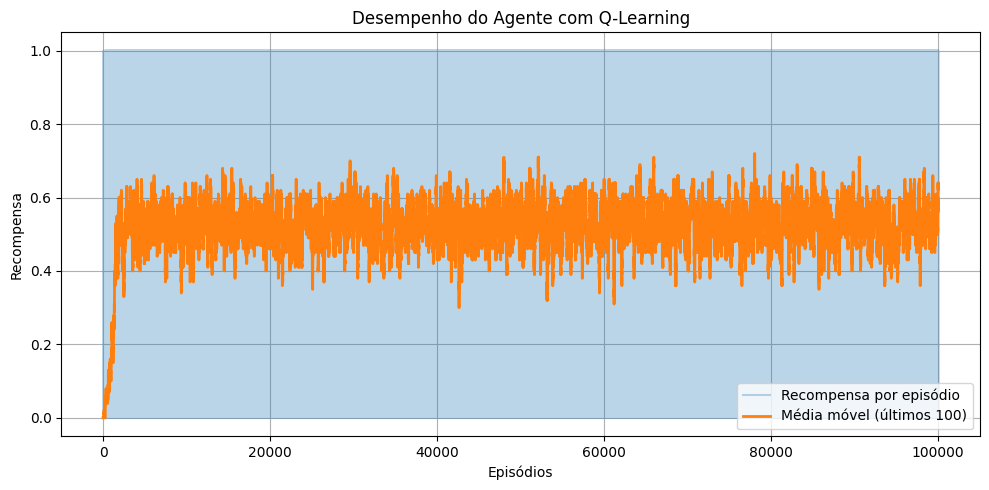

In [49]:
# Define o tamanho da figura (largura=10, altura=5)
plt.figure(figsize=(10, 5))

# Plota a curva de recompensas obtidas em cada episódio.
# A transparência (alpha=0.3) é usada para suavizar a linha e facilitar a visualização da tendência.
plt.plot(rewards, label="Recompensa por episódio", alpha=0.3)

# Plota a média das últimas 100 recompensas.
# Essa curva suaviza a variação dos episódios individuais, facilitando ver a evolução do aprendizado.
plt.plot(avg_rewards, label="Média móvel (últimos 100)", linewidth=2)

# Rótulo do eixo X
plt.xlabel("Episódios")

# Rótulo do eixo Y
plt.ylabel("Recompensa")

# Título do gráfico
plt.title("Desempenho do Agente com Q-Learning")

# Adiciona uma legenda para identificar as duas curvas
plt.legend()

# Adiciona grade para facilitar leitura dos valores no gráfico
plt.grid(True)

# Ajusta automaticamente o layout para evitar cortes de texto
plt.tight_layout()

# Exibe o gráfico na tela
plt.show()

# Visualização da politica aprendida

In [50]:
# Define os símbolos que representam cada ação da política aprendida:
# 0 = ← (esquerda), 1 = ↓ (baixo), 2 = → (direita), 3 = ↑ (cima)
action_symbols = ['←', '↓', '→', '↑']

# Cria uma matriz de strings vazias com o mesmo tamanho do grid do ambiente Frozen Lake (4 linhas x 4 colunas)
policy = np.full((4, 4), ' ')

# Itera por todos os estados do ambiente (0 a 15)
for state in range(n_states):
    # Calcula a linha e coluna correspondentes ao estado na grade
    row = state // 4
    col = state % 4

    # Marca o estado inicial com 'S'
    if state == 0:
        policy[row, col] = 'S'  # Start

    # Marca o estado final (objetivo) com 'G'
    elif state == 15:
        policy[row, col] = 'G'  # Goal

    # Para os demais estados, seleciona a melhor ação aprendida e insere o símbolo correspondente
    else:
        best_action = np.argmax(Q[state])               # Escolhe a ação com maior valor Q
        policy[row, col] = action_symbols[best_action]  # Representa com símbolo de seta

# Imprime a política final, linha por linha
for row in policy:
    print(' '.join(row))  # Une os símbolos com espaço e imprime

S ↑ ↑ ↑
← ← → ←
↑ ↓ ← ←
← → ↓ G


# Exibição visual (gráfica) do agente em ação

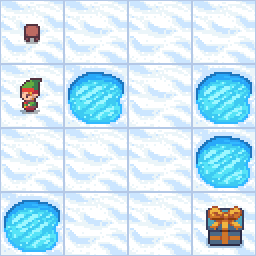

In [51]:
# Reinicia o ambiente e obtém o estado inicial
state, _ = env.reset()

# Define a variável de controle do episódio
done = False

# Lista que armazenará os frames (imagens) da simulação do agente
frames = []

# Executa o loop até o agente alcançar o final ou cair no penhasco
while not done:
    # Seleciona a melhor ação (aquela com maior valor Q) para o estado atual
    action = np.argmax(Q[state])

    # Executa a ação no ambiente e observa o próximo estado e indicadores de término
    state, _, terminated, truncated, _ = env.step(action)

    # Captura a imagem atual do ambiente e adiciona à lista de frames
    frames.append(env.render())

    # Verifica se o episódio terminou (sucesso ou falha)
    done = terminated or truncated

# Encerra o ambiente (libera os recursos gráficos)
env.close()

# Cria e salva um GIF com os frames capturados, com 0.5 segundos por frame
imageio.mimsave("Walk_Frozen.gif", frames, duration=0.5)

# Exibe o GIF gerado diretamente no notebook
display(Image(filename="Walk_Frozen.gif"))   # Exibe o gif gerado

# Salva a tabela Q para ser reutilizada posteriormente

In [52]:
import pickle  # Importa a biblioteca pickle, usada para salvar e carregar objetos Python em arquivos

# Salva a Q-table (dicionário com os valores aprendidos) em um arquivo binário
with open("q_table_Frozen.pkl", "wb") as f: # Abre (ou cria) o arquivo "q_table_Cliff.pkl" no modo escrita binária
    pickle.dump(Q, f)                       # Serializa o objeto Q e grava no arquivo

# Carrega uma tabela Q salva em outro treinamento

In [ ]:
from google.colab import files                  # Importa o módulo do Colab para upload de arquivos
uploaded = files.upload()                       # Abre a janela para o usuário selecionar e enviar o arquivo do computador

# Abre o arquivo de Q-table previamente salvo e carrega seu conteúdo
with open("q_table_Frozen.pkl", "rb") as f:     # Abre o arquivo no modo leitura binária
    Q = pickle.load(f)                          # Carrega a Q-table salva usando pickle

    # Converte a Q-table carregada para um defaultdict.
    # Isso garante que novos estados ainda retornem vetores de zeros automaticamente.
    Q = defaultdict(lambda: np.zeros(n_actions), Q)

# Considerações

Para essa atividade optei por usar um algoritmo gulosodevido a baixa complexidade de implementação. O algoritmo busca de forma aleatória qual a melhor ação a ser executada caso ela seja melhor que uma ação já conhecida.

# Referências
[O Paradigma Guloso](https://www.ime.usp.br/~pf/analise_de_algoritmos/aulas/guloso.html#:~:text=Um%20algoritmo%20guloso%20%C3%A9%20m%C3%ADope,em%20cada%20itera%C3%A7%C3%A3o%20s%C3%A3o%20definitivas.)
[Algoritmo Guloso](https://pt.wikipedia.org/wiki/Algoritmo_guloso)